In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape

(847, 2)

In [8]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [9]:
date = pd.date_range(start= '1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
df['month']=date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


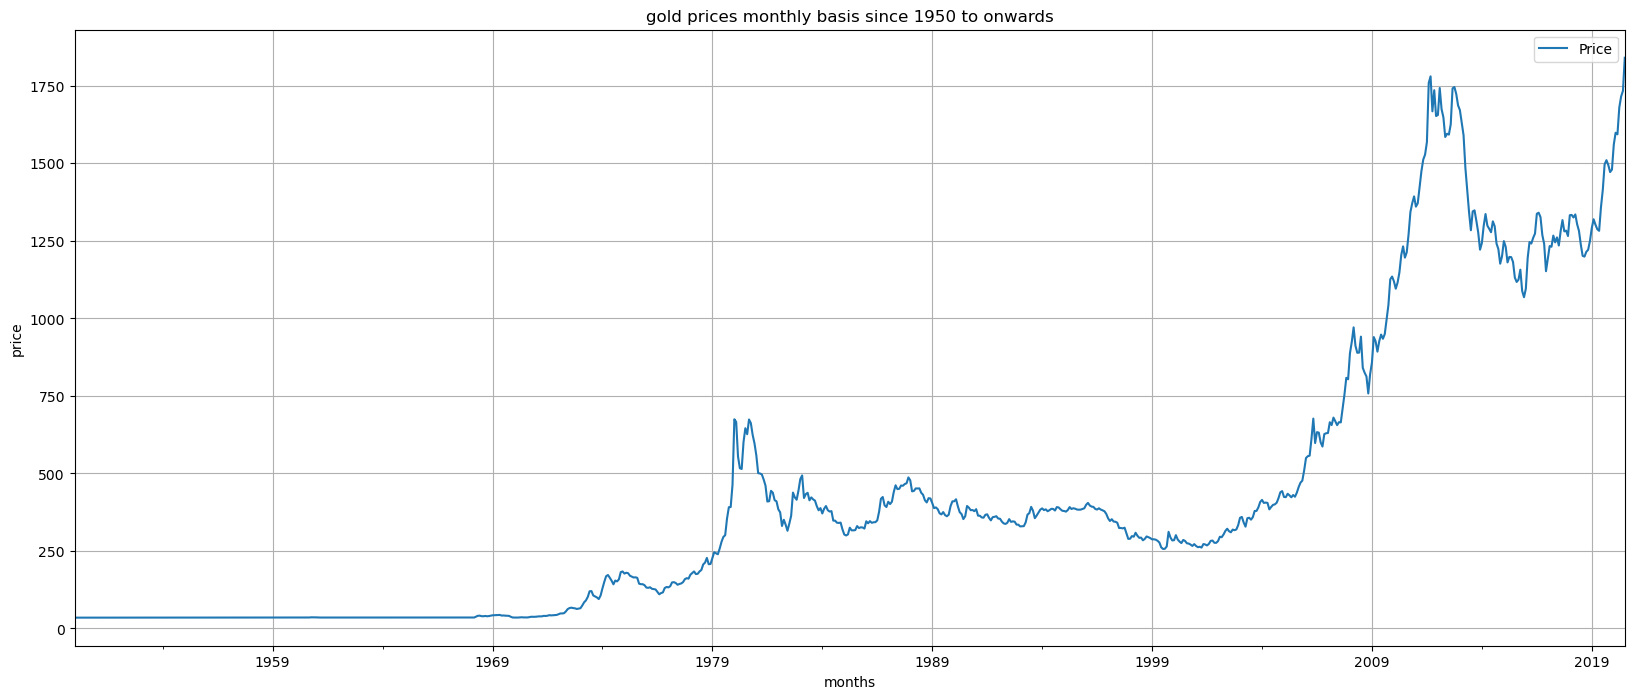

In [14]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly basis since 1950 to onwards")
plt.xlabel('months')
plt.ylabel('price')
plt.grid()

In [16]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


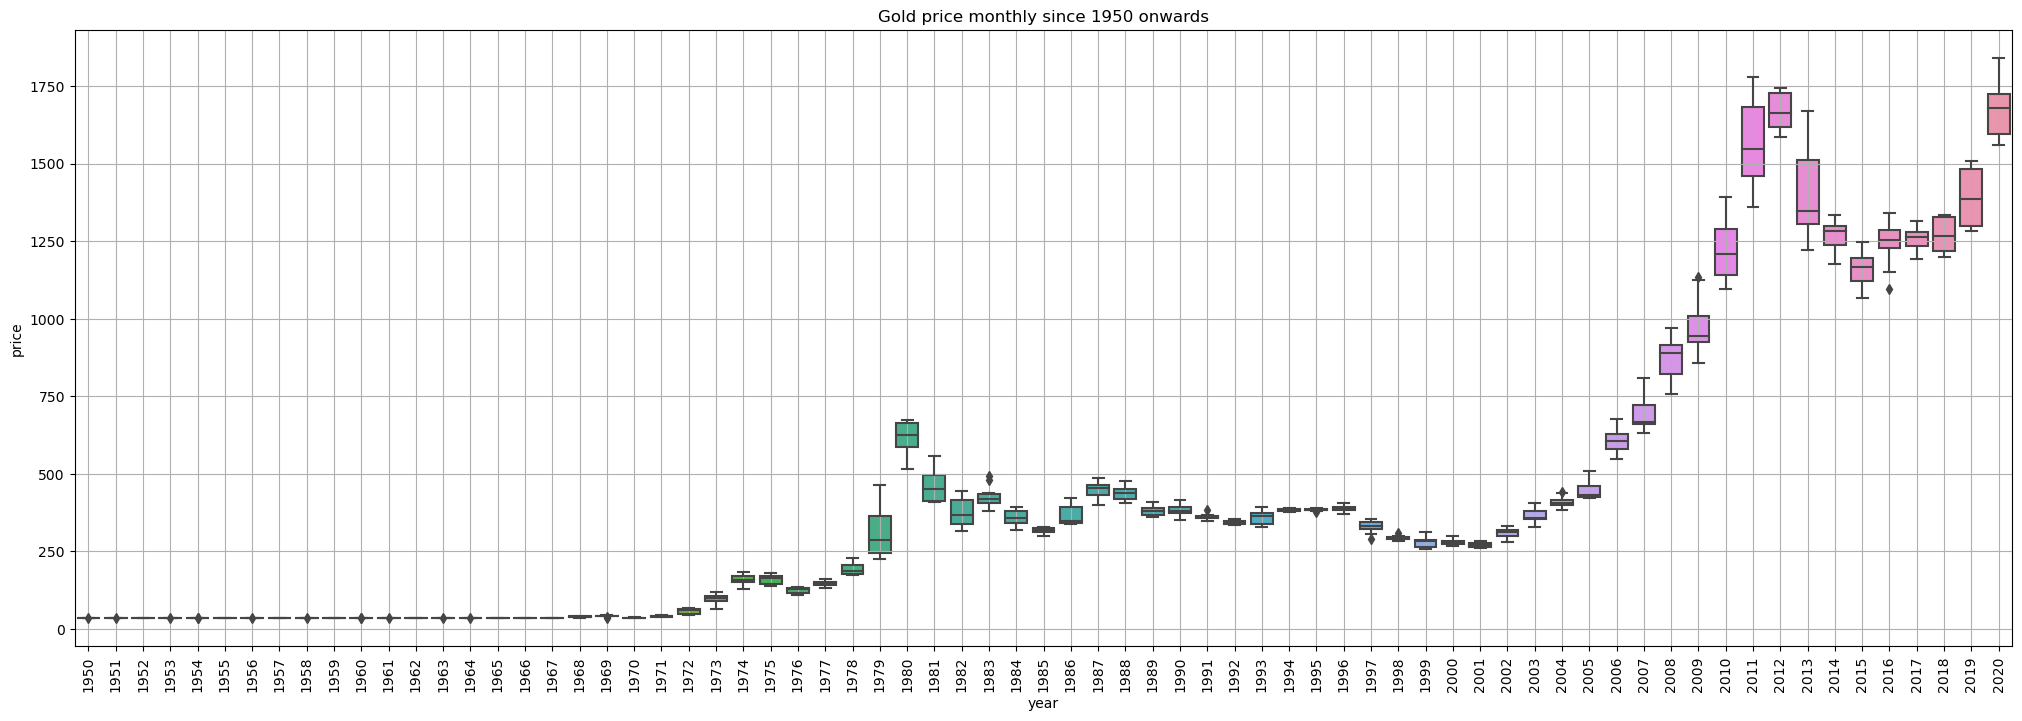

In [17]:
_, ax= plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

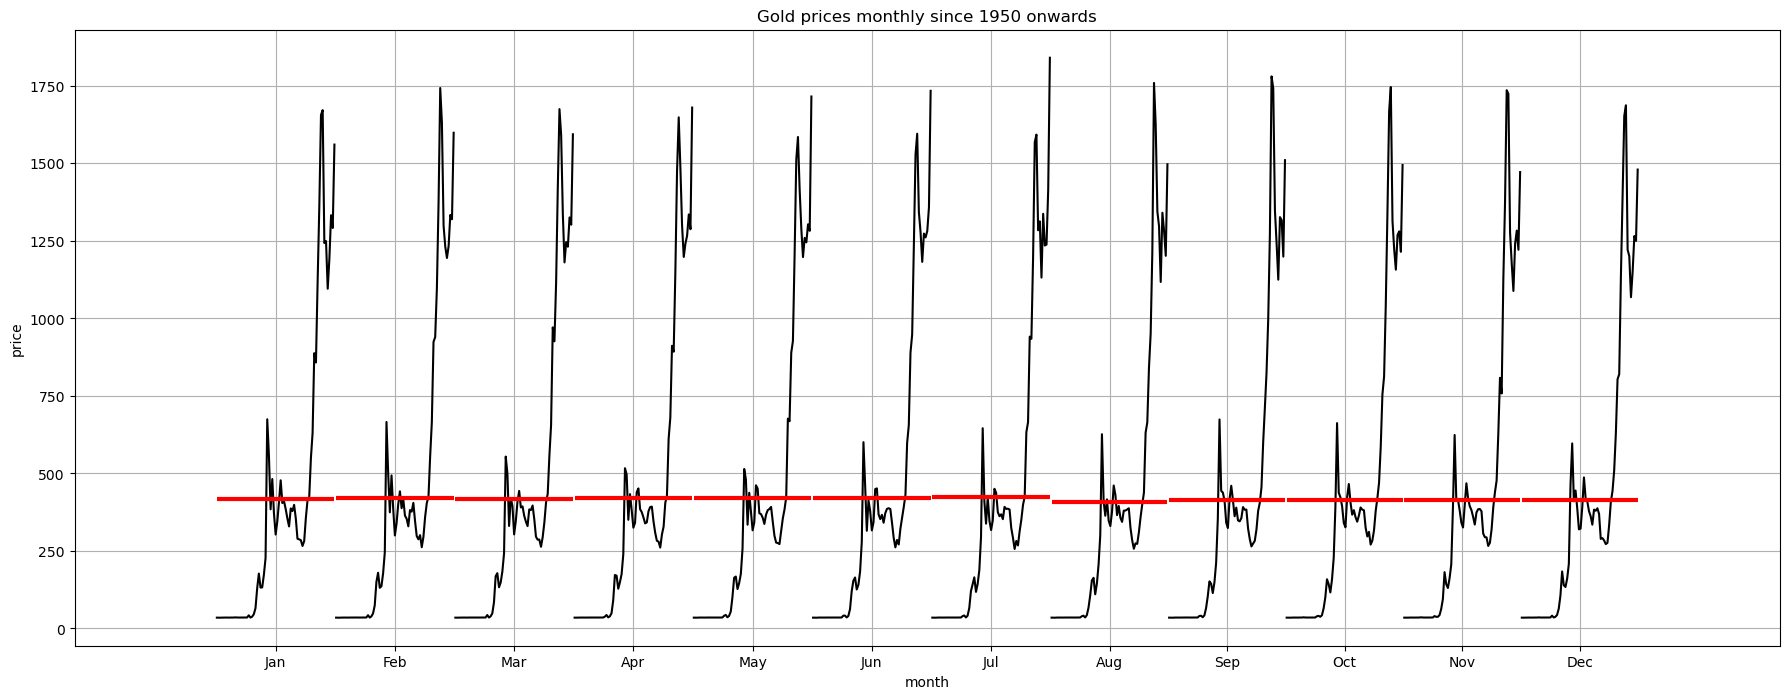

In [20]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(22,8))
month_plot(df,ylabel='Gold price', ax=ax)
plt.title('Gold prices monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

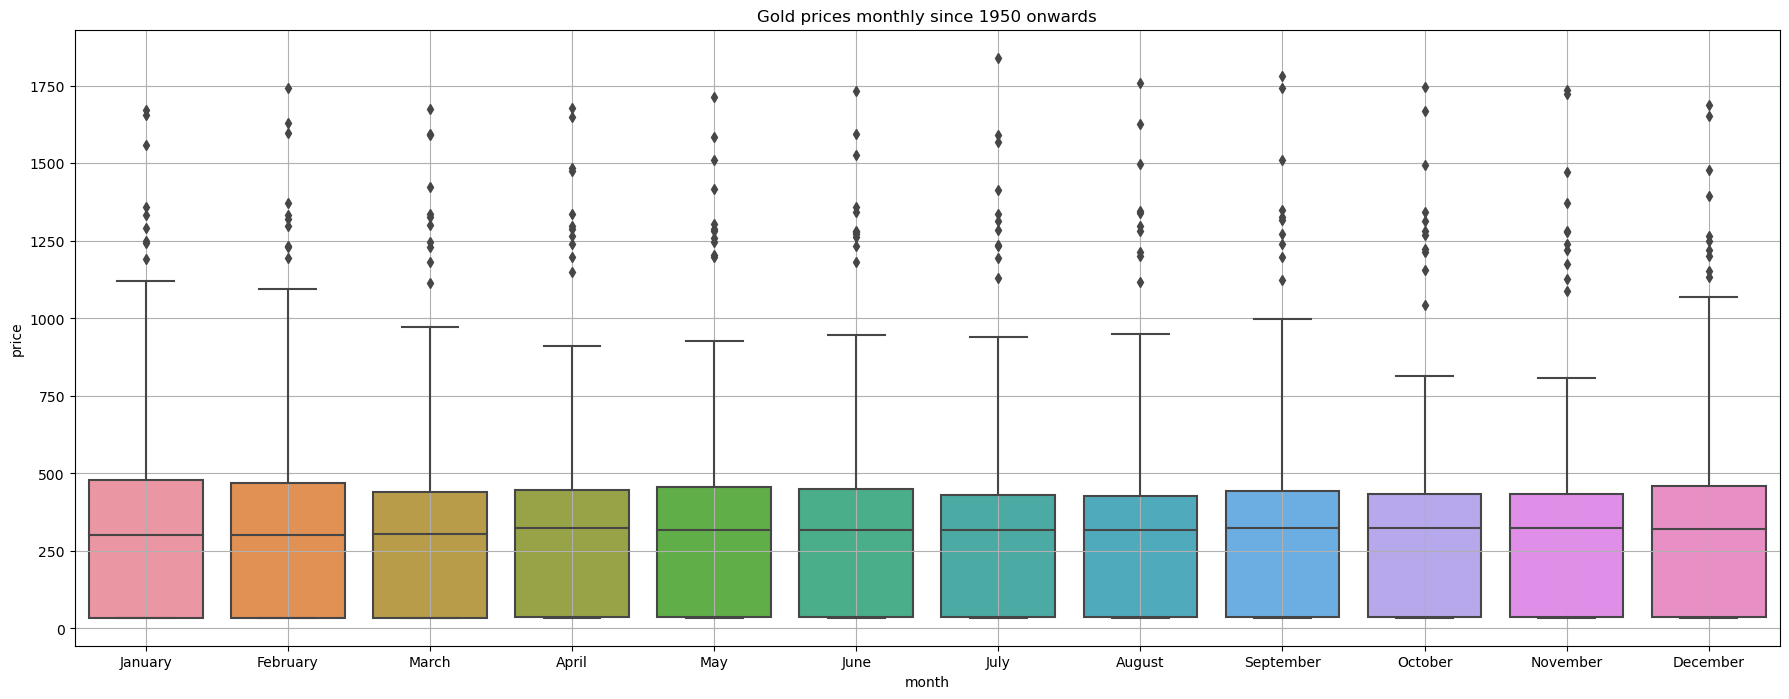

In [21]:
_, ax= plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold prices monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

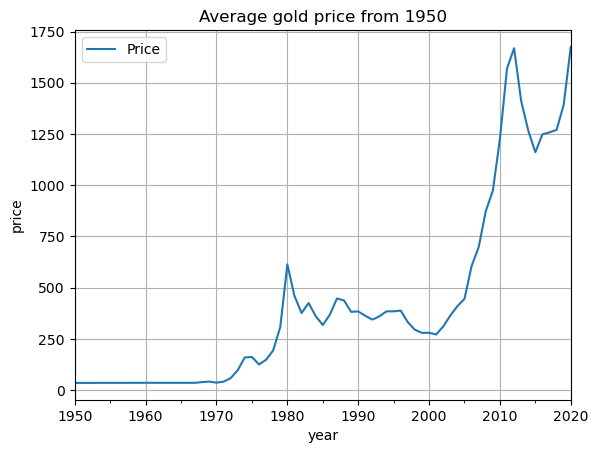

In [22]:
df_yearly_sum= df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Average gold price from 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

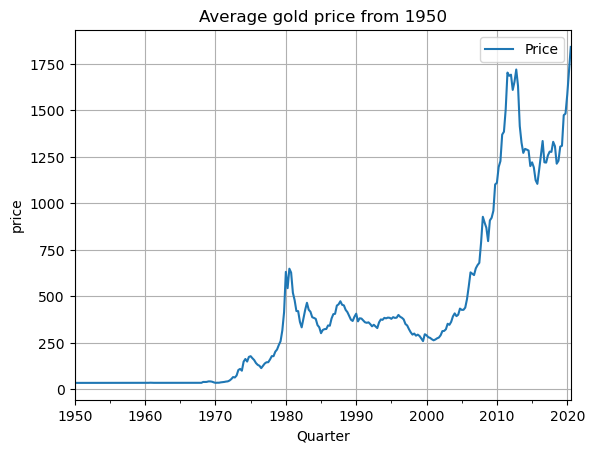

In [23]:
df_quaterly_sum= df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("Average gold price from 1950")
plt.xlabel('Quarter')
plt.ylabel('price')
plt.grid()

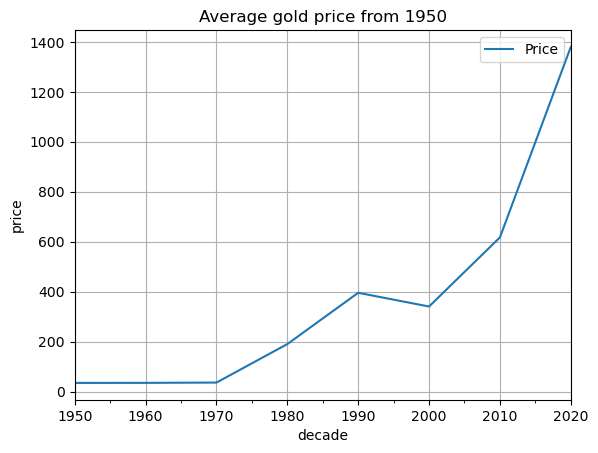

In [24]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Average gold price from 1950")
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [25]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


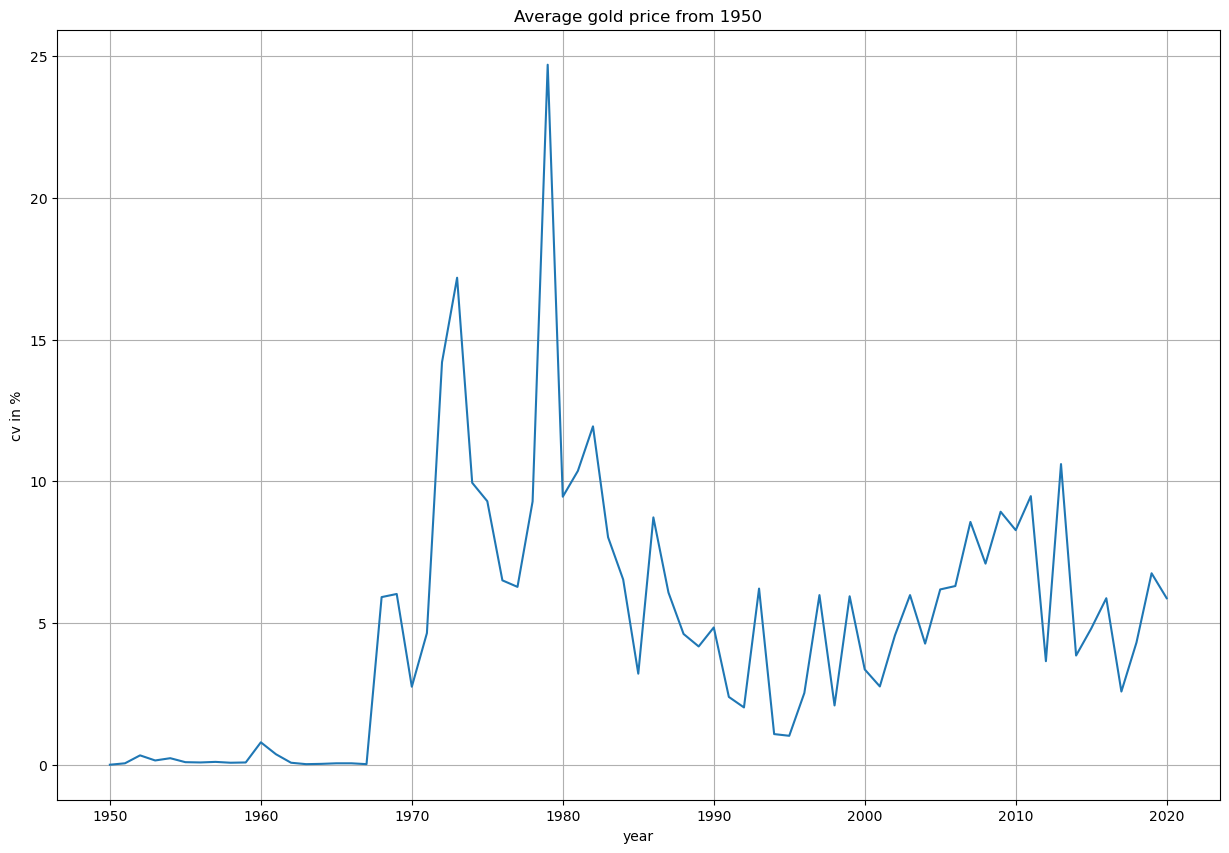

In [28]:
fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Average gold price from 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [29]:
train = df[df.index.year <=2015]
test = df[df.index.year > 2015]


In [31]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


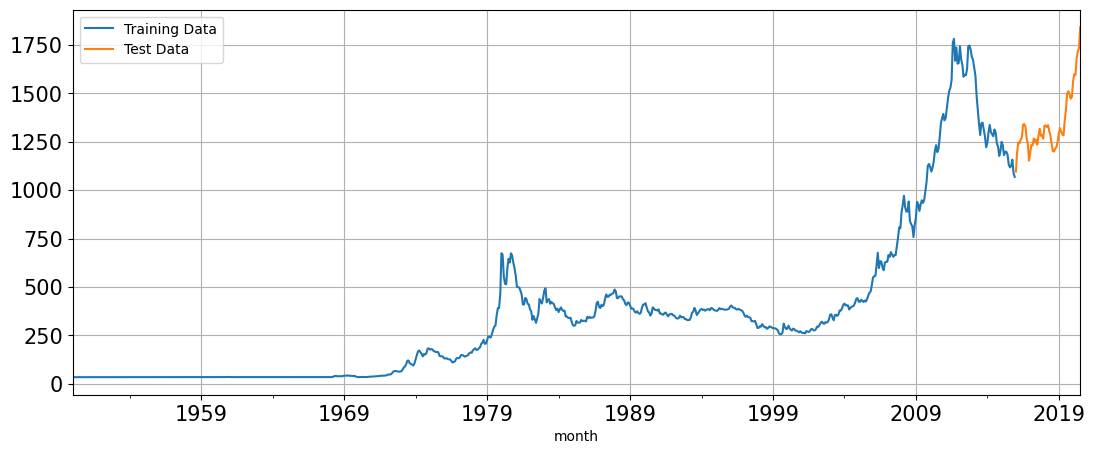

In [37]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [ ]:
#model formation

In [38]:
#1-->Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [39]:
Lr_train = train.copy()
Lr_test = test.copy()

In [40]:
Lr_train['time']= train_time
Lr_test['time']= test_time

In [43]:
lr = LinearRegression()
lr.fit(Lr_train[['time']],Lr_train['Price'].values)

LinearRegression()

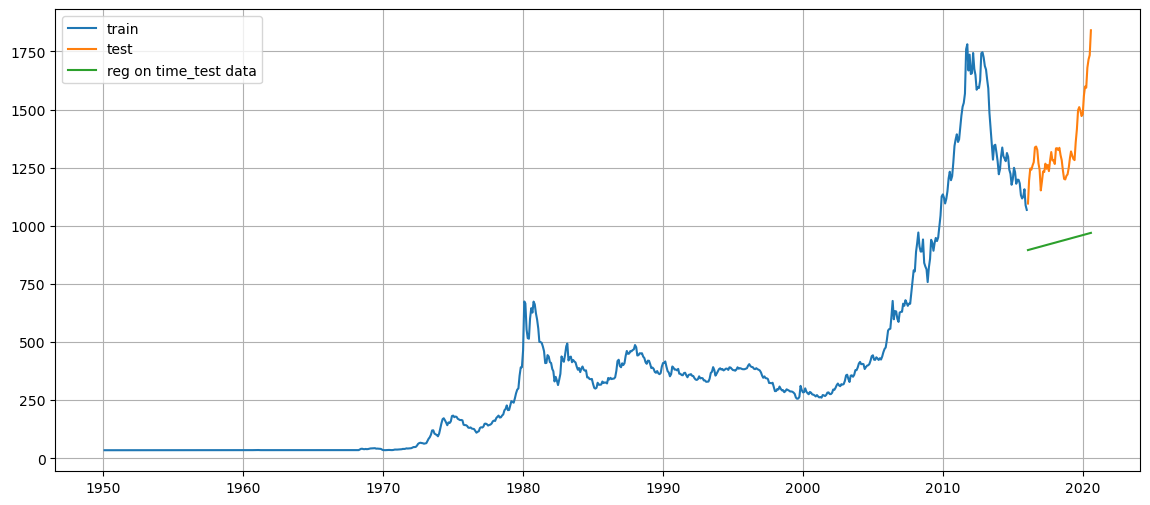

In [49]:
test_predictions_model1= lr.predict(Lr_test[['time']])
Lr_test['forecast'] = test_predictions_model1
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'], label='test')
plt.plot(Lr_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid()